In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [122]:
car_df = pd.read_csv("/Users/dhanrajtentu/Downloads/Machine Learning Projects/Car Price Predictor/quikr_car.csv")

In [123]:
car_df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [124]:
# Get info on the data 
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [125]:
car_df.shape

(892, 6)

## Check the data

In [126]:
car_df['fuel_type'].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

In [127]:
car_df['kms_driven'].unique()

array(['45,000 kms', '40 kms', '22,000 kms', '28,000 kms', '36,000 kms',
       '59,000 kms', '41,000 kms', '25,000 kms', '24,530 kms',
       '60,000 kms', '30,000 kms', '32,000 kms', '48,660 kms',
       '4,000 kms', '16,934 kms', '43,000 kms', '35,550 kms',
       '39,522 kms', '39,000 kms', '55,000 kms', '72,000 kms',
       '15,975 kms', '70,000 kms', '23,452 kms', '35,522 kms',
       '48,508 kms', '15,487 kms', '82,000 kms', '20,000 kms',
       '68,000 kms', '38,000 kms', '27,000 kms', '33,000 kms',
       '46,000 kms', '16,000 kms', '47,000 kms', '35,000 kms',
       '30,874 kms', '15,000 kms', '29,685 kms', '1,30,000 kms',
       '19,000 kms', nan, '54,000 kms', '13,000 kms', '38,200 kms',
       '50,000 kms', '13,500 kms', '3,600 kms', '45,863 kms',
       '60,500 kms', '12,500 kms', '18,000 kms', '13,349 kms',
       '29,000 kms', '44,000 kms', '42,000 kms', '14,000 kms',
       '49,000 kms', '36,200 kms', '51,000 kms', '1,04,000 kms',
       '33,333 kms', '33,600 kms', '5,

In [128]:
car_df['year'].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [129]:
print(car_df['Price'].unique())

['80,000' '4,25,000' 'Ask For Price' '3,25,000' '5,75,000' '1,75,000'
 '1,90,000' '8,30,000' '2,50,000' '1,82,000' '3,15,000' '4,15,000'
 '3,20,000' '10,00,000' '5,00,000' '3,50,000' '1,60,000' '3,10,000'
 '75,000' '1,00,000' '2,90,000' '95,000' '1,80,000' '3,85,000' '1,05,000'
 '6,50,000' '6,89,999' '4,48,000' '5,49,000' '5,01,000' '4,89,999'
 '2,80,000' '3,49,999' '2,84,999' '3,45,000' '4,99,999' '2,35,000'
 '2,49,999' '14,75,000' '3,95,000' '2,20,000' '1,70,000' '85,000'
 '2,00,000' '5,70,000' '1,10,000' '4,48,999' '18,91,111' '1,59,500'
 '3,44,999' '4,49,999' '8,65,000' '6,99,000' '3,75,000' '2,24,999'
 '12,00,000' '1,95,000' '3,51,000' '2,40,000' '90,000' '1,55,000'
 '6,00,000' '1,89,500' '2,10,000' '3,90,000' '1,35,000' '16,00,000'
 '7,01,000' '2,65,000' '5,25,000' '3,72,000' '6,35,000' '5,50,000'
 '4,85,000' '3,29,500' '2,51,111' '5,69,999' '69,999' '2,99,999'
 '3,99,999' '4,50,000' '2,70,000' '1,58,400' '1,79,000' '1,25,000'
 '2,99,000' '1,50,000' '2,75,000' '2,85,000' '3,40,00

## To be changed
- price needs to be changed to int, there should be no comma 
- in Year remove any words and only keep year
- kms need to include only numbers
- remove nan values from fuel
- Keep only 3 Words from the name

## Cleaning the Data

1.Cleaning the Price

In [130]:
car_df = car_df[car_df['Price'] != 'Ask For Price']

In [131]:
car_df['Price'] = car_df['Price'].str.replace(',','').astype(int)

In [132]:
car_df['Price'].dtype

dtype('int64')

2. Cleaning the Year

In [133]:
car_df = car_df[car_df['year'].str.isnumeric()]

In [134]:
car_df['year']= car_df['year'].astype(int)

3. cleaning the kms

In [135]:
car_df = car_df[car_df['kms_driven'] != 'Petrol']

In [136]:
car_df['kms_driven'] = car_df['kms_driven'].str.split().str.get(0).str.replace(',','')

In [137]:
car_df['kms_driven'] = car_df['kms_driven'].astype(int)

4. Cleaning the Fuel column

In [138]:
car_df = car_df[~car_df['fuel_type'].isna()]

5. Cleaning the name column

In [139]:
car_df["name"] = car_df['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

In [140]:
car_df.shape

(816, 6)

In [141]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int64 
 3   Price       816 non-null    int64 
 4   kms_driven  816 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(3), object(3)
memory usage: 44.6+ KB


In [142]:
car_df.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


In [143]:
# more than 50% of the data is below 5 Lakh price, this states there is some outliers

car_df = car_df[car_df['Price'] < 5000000]

In [144]:
car_df['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

checking relationship of price with company

/var/folders/2z/q1dh9xf94t90cdmnnxxh8pv80000gn/T/ipykernel_5123/1131110268.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='company',y='Price', data=car_df,palette='pastel')
/var/folders/2z/q1dh9xf94t90cdmnnxxh8pv80000gn/T/ipykernel_5123/1131110268.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation =35,ha='right')


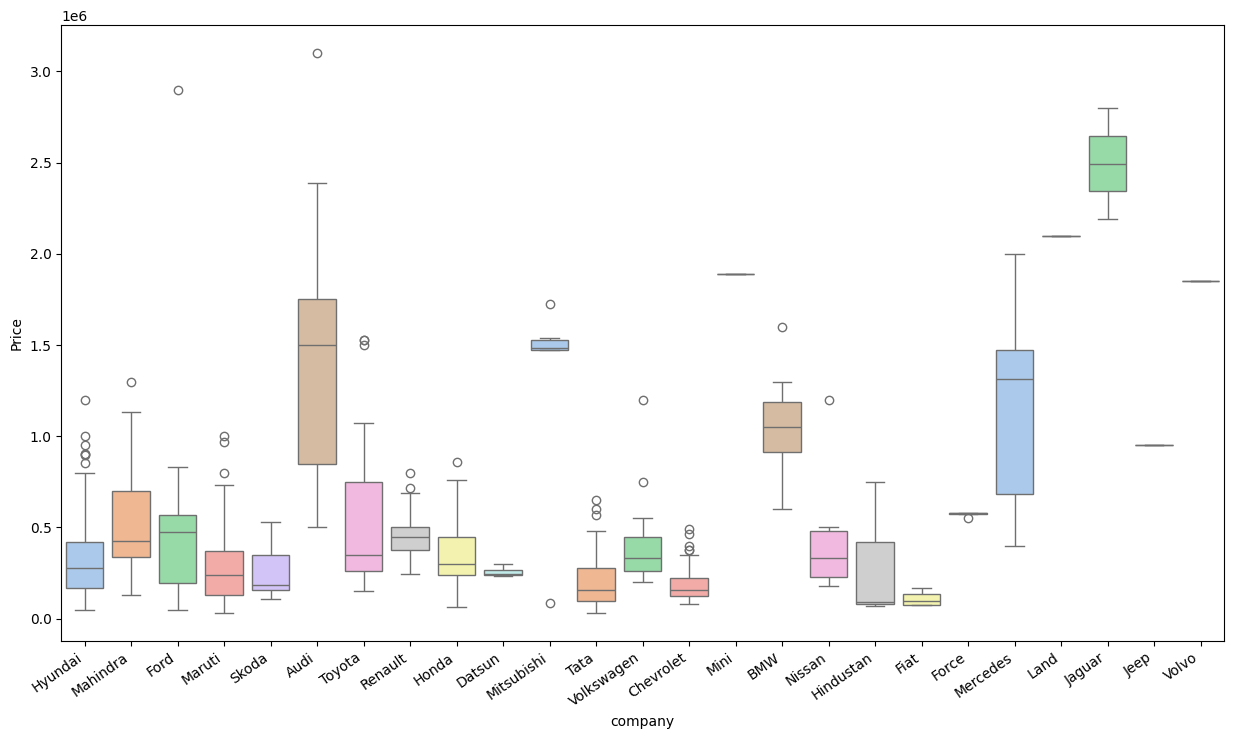

In [145]:
plt.subplots(figsize = (15,8))
ax = sns.boxplot(x='company',y='Price', data=car_df,palette='pastel')
ax.set_xticklabels(ax.get_xticklabels(),rotation =35,ha='right')
plt.show()

 Checking the relationship with the year

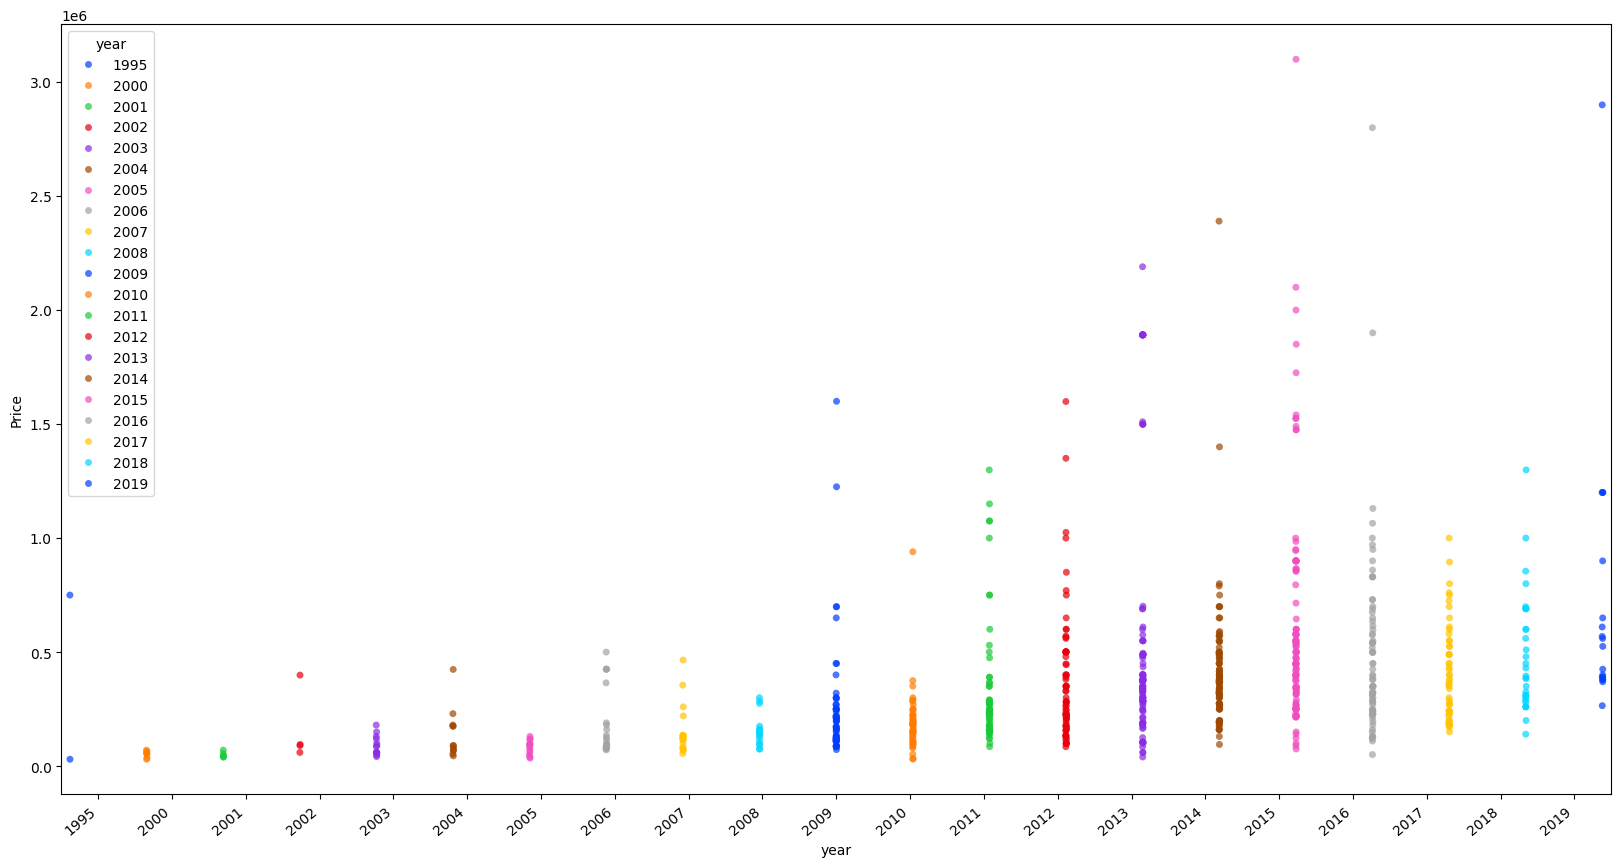

In [146]:
plt.figure(figsize=(20,10))
ax = sns.stripplot(x='year', y='Price', data=car_df, hue='year', palette='bright', dodge=True, alpha=0.7)
plt.xticks(rotation=40, ha='right')
plt.show()


checking relationship of kms with price

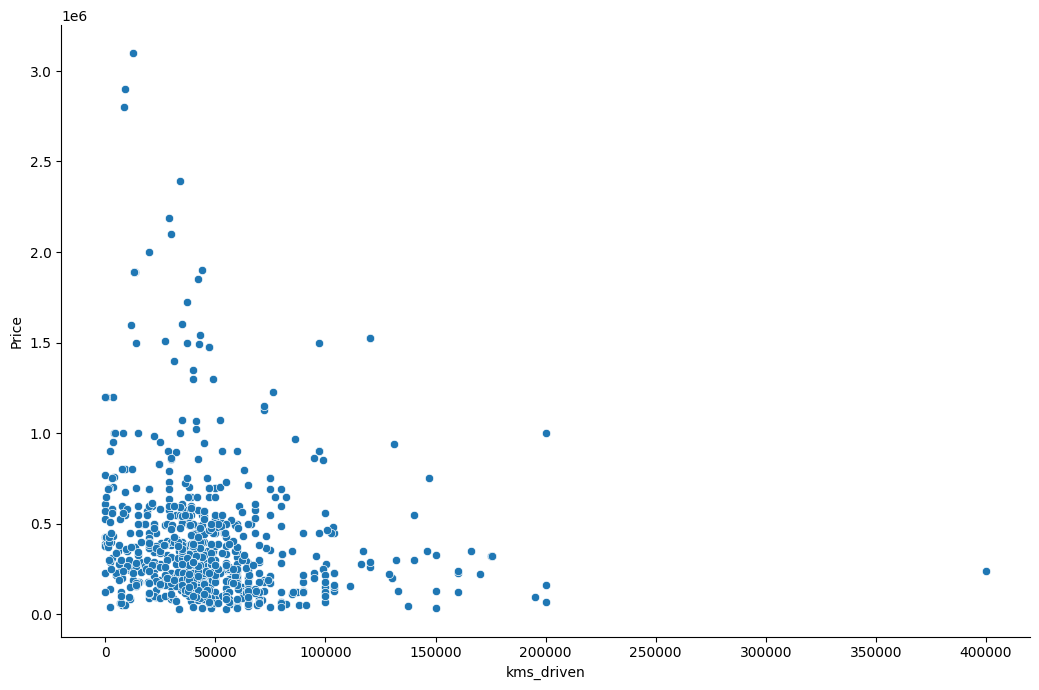

In [147]:
sns.relplot(x='kms_driven',y='Price',data=car_df,height=7,aspect=1.5)
plt.show()

<Axes: xlabel='fuel_type', ylabel='Price'>

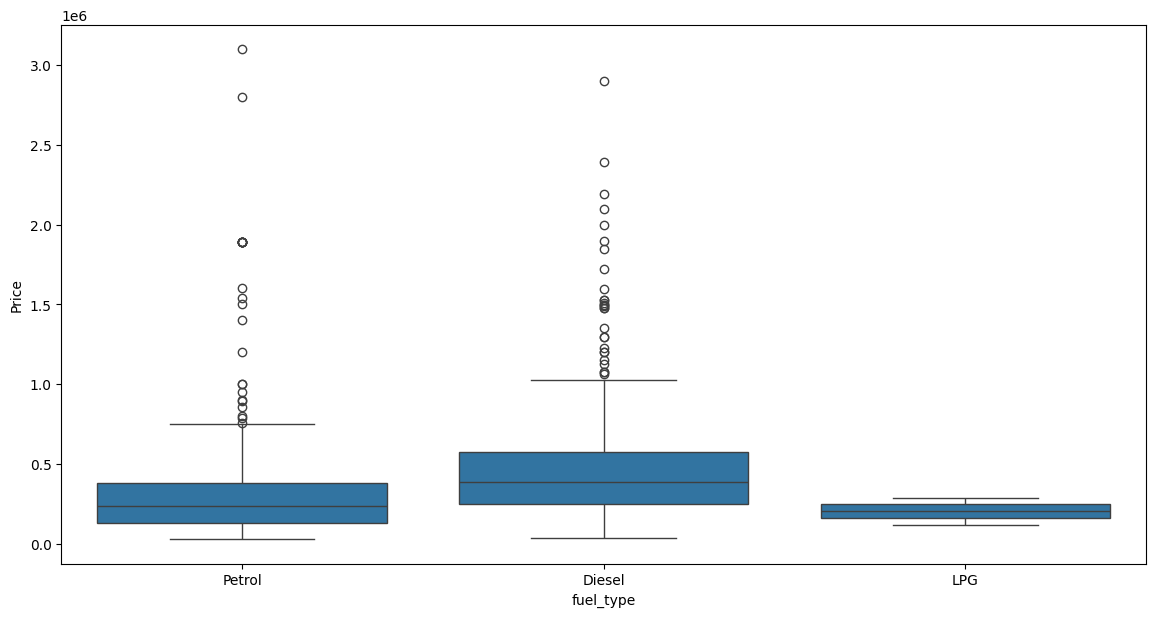

In [148]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type',y='Price',data=car_df)

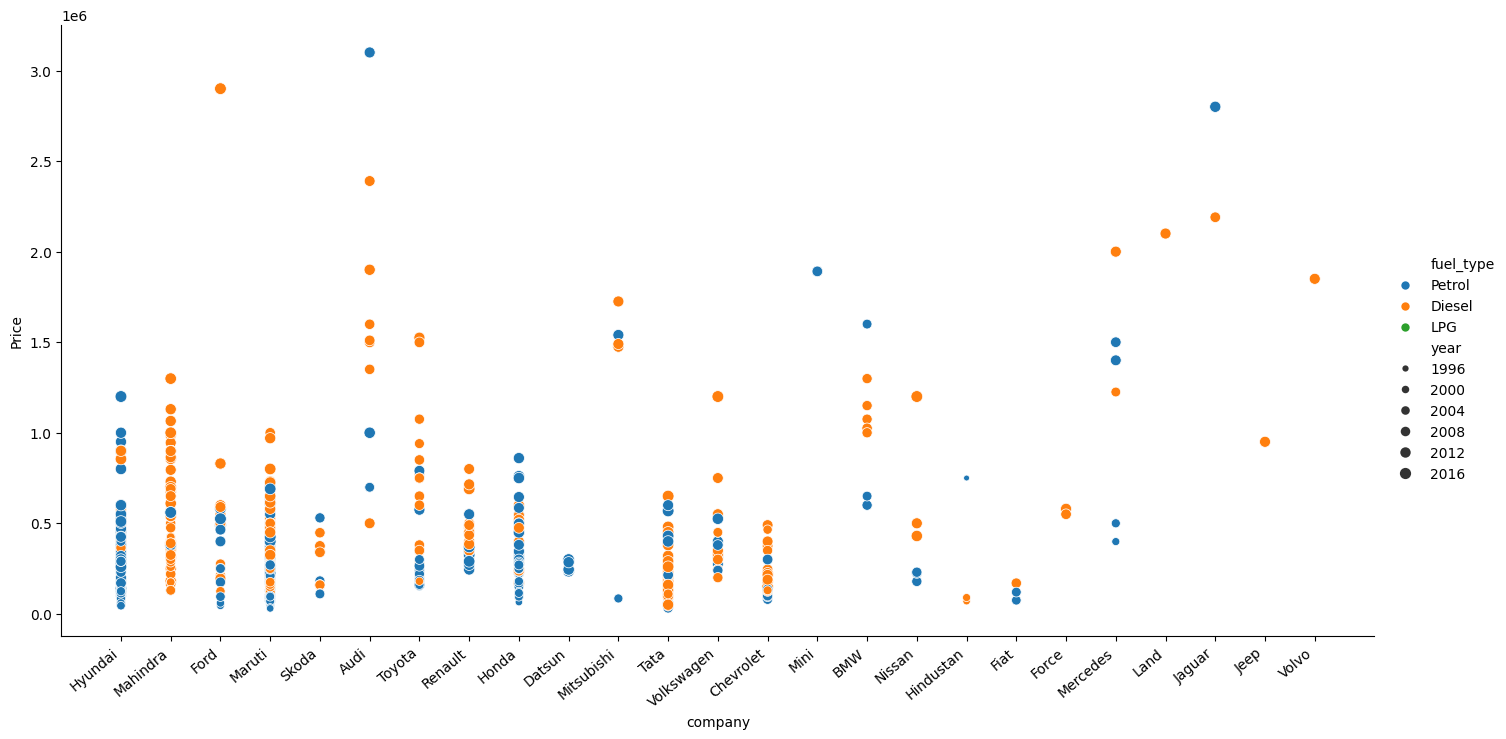

In [149]:
ax=sns.relplot(x='company',y='Price',data=car_df,hue='fuel_type',size='year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

In [150]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [151]:
X = car_df.drop('Price', axis=1)
y = car_df['Price']

In [152]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [153]:
lr = LinearRegression()
# Make one hot labling
ohe = OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])
ohe.categories_

[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
        'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
        'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
        'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
        'Chevrolet Beat LS', 'Chevrolet Beat LT', 'Chevrolet Beat PS',
        'Chevrolet Cruze LTZ', 'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4',
        'Chevrolet Sail 1.2', 'Chevrolet Sail UVA', 'Chevrolet Spark',
        'Chevrolet Spark 1.0', 'Chevrolet Spark LS', 'Chevrolet Spark LT',
        'Chevrolet Tavera LS', 'Chevrolet Tavera Neo', 'Datsun GO T',
        'Datsun Go Plus', 'Datsun Redi GO', 'Fiat Linea Emotion',
        'Fiat Petra ELX', 'Fiat Punto Emotion', 'Force Motors Force',
        'Force Motors One', 'Ford EcoSport', 'Ford EcoSport Ambiente',
        'Ford EcoSport Titanium', 'Ford EcoSport Trend',
        'Ford Endeavor 4x4', 'Ford Fiesta', 'Ford Fiesta SXi', 'Ford Figo',
        '

In [154]:
column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),remainder='passthrough')

In [155]:
pipe = make_pipeline(column_trans,lr)

In [156]:
pipe.fit(X_train,y_train)

/Users/dhanrajtentu/Library/Python/3.9/lib/python/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [157]:
y_pred = pipe.predict(X_test)

In [158]:
r2_score(y_test,y_pred)

0.6237729601423649